# Data Analysis project

In [14]:
# Import pandas
import pandas as pd
from pandas import Series, DataFrame

#Load the data as DataFrame
titanic_df=pd.read_csv('Titanic_Detailed.csv')

In [15]:
#preview the data
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
#overall info of the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
#converting columns from objects to categories
titanic_df.Sex=pd.Categorical(titanic_df.Sex)
titanic_df.Cabin=pd.Categorical(titanic_df.Sex)

In [19]:
#Looking at the difference in the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null category
Embarked       889 non-null object
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.7+ KB


### Who were the passengers on Titanic? (Age, Gender, Class, etc.)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

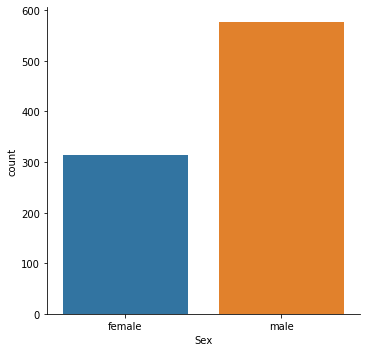

In [22]:
#Checking the gender
sns.catplot(x='Sex', data=titanic_df,kind='count')

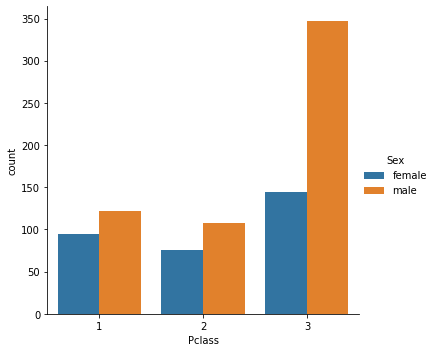

In [28]:
#Separating the genders by classes
sns.catplot('Pclass', data=titanic_df, hue="Sex", kind='count')

In [29]:
#Treating everyone below 16 years of age as child and sorting the rest through sex

def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return "child"
    else:
        return sex
    
#Define a new column name called person
titanic_df["person"]=titanic_df[["Age","Sex"]].apply(male_female_child, axis=1)

#convert data type to category to have the correct sort in the graphics
titanic_df.person= pd.Categorical(titanic_df.person)

In [30]:
#Visualizing the changes

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,male,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,female,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,female,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,female,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,male,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,male,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,male,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,male,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,female,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,female,C,child


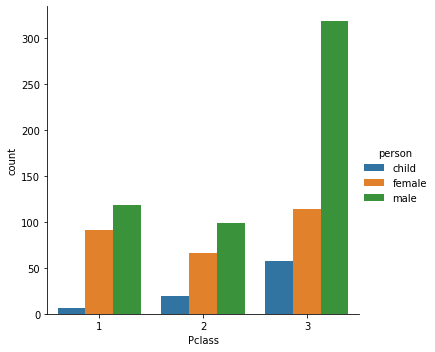

In [31]:
sns.catplot('Pclass',data=titanic_df, hue='person',kind='count')

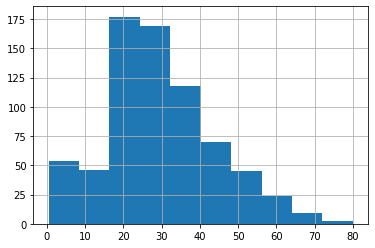

In [34]:
titanic_df["Age"].hist()

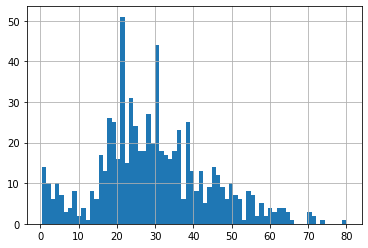

In [35]:
titanic_df["Age"].hist(bins=70)

In [36]:
#Quick overall comparison of male,female and children
titanic_df["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [38]:
titanic_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

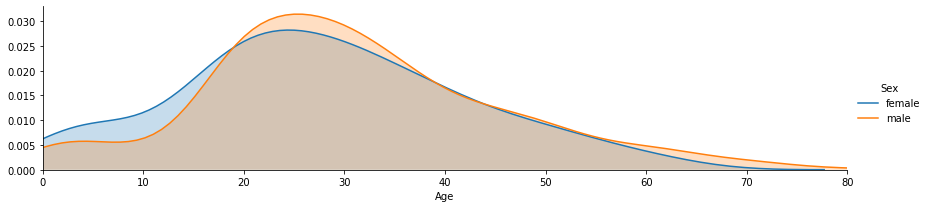

In [49]:
# Another way to visualize the data is to use FaceGrid to plot multiple kdeplots on one plot.

fig= sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# next, use the map to plot all the possible kdeplots for the "age" column by hue choice
fig.map(sns.kdeplot,"Age",shade=True)

# set the x max limit by the oldest passenger
oldest=titanic_df["Age"].max()

# sincdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA6EAAADQCAYAAAD2zWfTAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdd3yb1b3H8c+RZHnvOI5jJ3Gc6eyQRRJGIJMVIFBI2WV2QSmlg67LaAu3t4NCue3l9lJGyyqUUVZK2CN778Rx7HiPOPGMl3TuH49STJphEtny+L5fL1WWdfToZ5dY+uqc53eMtRYRERERERGRzuAKdQEiIiIiIiLSeyiEioiIiIiISKdRCBUREREREZFOoxAqIiIiIiIinUYhVERERERERDqNJ9QFfBELFiywb731VqjLEBERERGR3smEuoCeoFvNhFZWVoa6BBERERERETkJ3SqEioiIiIiISPemECoiIiIiIiKdRiFUREREREREOo1CqIiIiIiIiHQahVARERERERHpNN1qixYR6WF8LVBbGrgUB65LoLnBud8Y/tUJ/dDXxoDbCzGpEJsKMf0+u/ZGheonEREREZF2UggVkY7XVAfFa6FgJRSvgwN7oaYYGvYB9vNjXR4IiwRrP7vPHvqfwG1fM/h9//484bFOOI3rDynZ0G8MpI6BvtnOMUVEREQk5BRCRSS4rIWqXCdwFq6CwpVQtgWs37k/PgNi0yBjMkQmQVQyRB26TnaCpDnOmQLWD021cHA/NFQ51wernEvDfqgrd5675aAz3rggeSj0G+uE0n7jIGMSRCZ27O9CRERERP6NQqiInDy/H/Z+Chufh+2vBWY4gbAo6DMcxl4GKSMhZYQTMk+WcUFEvHNJzDzyGOt3lvfu3wNVe5zrPR/B5hc/O0baBMiaBVlnwoBTISzi5GsTERERkWMy1trjj+oiJk+ebFevXh3qMkTkkLKtsPE52PQ3qCkCTwQMmObMOKaMhPgB4HKHusrPa6pzZmrLNkHJRqjc7izt9YTDwOkw+EwnmKaN73q1i4iISKiZUBfQE7QrhBpjFgC/A9zAn6y1Dxx2fzjwJDAJ2Adcbq3NM8ZMBR49NAy421r7UnuOeSQKoSJdQHWREzo3Pg/lW8C4IX0iDJ7VPWcTWxqc5cLF66F0A+zPc74f3QeyL4Qxi2DgDHCpmbiIiIgohAbDcUOoMcYN7ATmAoXAKuDL1tqtbcZ8HRhnrf2qMWYxcLG19nJjTBTQbK1tNcakARuA/jjdRY55zCNRCBUJoeL18P79sHMJYJ2ZzsFnQubpEJkQ6uqC5+B+KFkPe1c455X6mpxmR6MvhtGLIGOKAqmIiEjvpRAaBO05J3QqkGOtzQUwxjwLXAi0DYwXAncHvn4B+L0xxlhrG9qMieCzNpjtOaaIdAWlm5zwuf1153zOcZfDkNkQlxbqyjpGZCJkneVcWg46jZX2fASrH4MVf4S4dCeQjr3UOafU6LVIRERE5ItoTwhNBwra3C4Eph1tTGDWsxpIBiqNMdOAx4BBwNWB+9tzTACMMTcDNwMMHDiwHeWKSFCUbXXC57ZXwRsNE66E7IXO171FWKQz2zv4TGfv0oLlkPeRE0aX/d7psjvlBhj7pd71exERERE5Ce0JoUf6mP/wNbxHHWOtXQGMNsZkA08YY95s5zEJPP5RAueVTp48uft0URLprip2wPsPwJaXnBA2/ssw6kLwxoS6stDyRsGQs51LUx3s+QB2vgn/+Bb888fO72nyDdB3ZKgrFREREenS2hNCC4EBbW5nAMVHGVNojPEA8UBV2wHW2m3GmHpgTDuPKSKdqaEKlvwINjzjNBcaexmMvig4W6r0NOExMPI8GHEuVGyDHW/A6j/DykedJkZTbnBmjT3eUFcqIiIi0uW0J4SuAoYZYwYDRcBi4IrDxrwKXAssAy4F3rXW2sBjCgJLcAcBI4A84EA7jikinWXba/Da7U5TntEXw5hLnD045diMgb6jnMuUmyDnbadx04s3ON11p34Vpt7onGcqIiIiIkD7t2g5F3gQZzuVx6y1PzfG3Austta+aoyJAJ4CJuLMgC621uYaY64GfgC0AH7gXmvty0c75vHqUHdckSBrqII3v+dsuZI0BGbeDkmDQ11V92b9ULwOtv8DClc7y5in3ACnfgNiU0NdnYiIiJwcdSQMgnaF0K5CIVQkiLa/7pzPeLAKxi12muu42rM4Qtqtag9sfsFpZuQKg4lXwczbIDEz1JWJiIjIiVEIDQKFUJHepqEK3vw+bHoekrICs59Zoa6qZ6sphs0vwu53nZnSsZfCad+GvtmhrkxERES+GIXQIFAIFelNtr8B/7jNmf0cezmMu0yzn52pvhK2vgw734LWRqd50dk/gZThoa5MRERE2kchNAgUQkV6A78Plt4Nnz7U4bOffmspq7cU1PrZ32ipa7HUNkNds6W22bld12xp8YPHBR5jcLvAY5zbbpch3A2JEYakCENy5KFrF0kRhugwMKab//1vrHH2X932CrQ2Oct0z/wBxKeHujIRERE5tm7+JqRrUAgV6emaauHFG53ZtxHnOl1c3WEnfdjyej8bK3zk1fgpqPGzt9ayt8ZPQa2fZt+RHxPmgugwiPRAmAGfbXPxf/Z1kw9a/Ec+RrgbMmJdDI53MSjORWab6/4xBo+rG702NFbDxudgx5vgcsHUW5xlulFJoa5MREREjqwbvdHouhRCRXqy/fnwzGKo2AFTb4KR55/QYRpbLZsrfawv97GuzMe6ch/FdZ/97YjyQL9o6BfpXKdFQWoUJIQ79x26hLnb93zWQqMPqpuhuilw3Qw1TbC/CUoboKQBSuqdwHqIx0BWgosxfdyM6uNidB83o5LdxId38deLujJY/1fY/Z6zL+tpt8O0r4E3KtSViYiIyOd18TcV3YNCqEhPtXc5PHuFs9zzzO9D/4ntfqjfWtaX+1ia18pHRa1sq/TTGvhTkRoJIxJheIJznREDsWHOlpmdzVqoanLCaHHgsqcGcmugqvGzcQNiDWP6uBnX182Ufm7GprgJd3fB15D9ebDuSShYCTGpMOsHcMq14GpnehcREZGO1gXfQHQ/CqEiPdH6p53tV6JTnMY38RnHfcjBFsvHRa0szW/lnfxWKg9aXAZGJUF2ohM4RyRAUkQn1B8EVY2QWw27a2B3tfN1SYNzX7gbJvR1MzXNzZR+Hk5JdRPj7UKvKeVbYc0TUL4FUsfAOb+EzJmhrkpEREQUQoNCIVSkJ2nbgChtPJx5F4THHHV4Y6vlzdwWXs9t5ePCVhp9zrLZyX1hWipM6gux3s4rv6MdaIItVbBlH2ytcsKpH3AbGN3HxRkZHs4c4GFiqjv055ZaC/mfwOrHoL4cxlwCc+9t1wcKIiIi0mEUQoNAIVSkp/hcA6LznHNAj7L9yrZ9Pp7d1sxLu1qoaYaUSCd0ntoPxiQ7DYR6g4ZW2F7lBNON+2D7fvBbJ3jPTHcC6RkZHtJjQ/gLaW109hjd/KKzLPe078CMWyGsm0xJi4iI9CwKoUGgECrSEzTWwF8WQdHaozYgqm+xvLa7hWe2NbO+3E+YC2akwfyBMDYZQj3x1xXUtcCGClgTuFQedL4/NMHFnEwP8zM9jO/rxhWKE2DrymD1/0H+p5AwCOb/3Pn/ubtvVyMiItK96IU3CBRCRbq7xmp46hIoWQtnfB8Gzfjc3Xtr/Dy6oYmXdrVQ3wIDY2DeQDg7A+LDQ1RzN2AtFNTBmnJYXQ6b9jnbx/SNMszP9DB/cBjT0tyEdXaDo5L1sPJ/4UA+ZM2Cc38NfYZ2bg0iIiK9l0JoECiEinRnBw/AUxdD6UY48wcw8NR/3bX7gI9H1jXzyq4WXAbO6A8LBjlNhjR59sXVNsOqMlhWCmsrnC1k4r0we1AY52Q5S3e9nRVI/a2w4w1nWxdfC5x+p7Oti0efKoiIiHQwvYsKAoVQke7qcwH0Lhg4DYDt+3z8fl0Tr+9uxeuGcwbBoiGQrFMIg6axFdZVwrISWFnuBNR4L5yTFcbCoc4Mqbsz1jc3VMGq/4W8j6DPcLjgd/82Ey4iIiJBpRAaBAqhIt3Rwf2BALoZZt0FA6ayscLHw2ubeDuvlUgPnJ8JF2VBgibHOlSrH9ZXwPtFsLwMDrY6S3bPywpj4VAPE/q6MR099Vy4Clb80Tlv9JRrYe49EJnYsc8pIiLSOymEBoFCqEh301AFT10EZVvhrB9SGD+JB1Y08truVmLCYOFg59KTtlbpLhpbYVU5fFDknEfa4odBcYZLR3hZNCysY7vstjQ6y3O3vQpRSbDgAWdbF629FhERCSa9sAaBQqhId9JQBU8uhIodNJ5+F4+Uj+XRDc2As+R2URZEhYW4RgGcTrvLSuDdQmf7FwPMSHdz2Qgv8wd7iPB00GvYvt2w/PdQuQuGzoHzfgOJgzrmuURERHofhdAgaFcINcYsAH4HuIE/WWsfOOz+cOBJYBKwD7jcWptnjJkLPAB4gWbgu9badwOPeR9IAwKbIDDPWlt+rDoUQqVXq98HTy7EVu7kk2Hf446doylvsMxKh+uynb0+pWsqbYB3CuCdQihrgJgwuGBoGF8aEcbEjliu6/fBjtdh3VOAgXn3waTrwdVLNoAVERHpOAqhQXDcEGqMcQM7gblAIbAK+LK1dmubMV8Hxllrv2qMWQxcbK293BgzESiz1hYbY8YAS6y16YHHvA/caa1td6pUCJVeq6kWHj8Pf9k27g7/Dk/uH8vwBLh5NGQnhbo4aS+/dbZ6eacAPilxOuwOT3Rx5SgvFw0LIz48yK9rdeWw7GEoXgeDToMLfw9Jg4P7HCIiIr2LQmgQtCeETgfuttbOD9y+C8Bae3+bMUsCY5YZYzxAKZBi2xzcOB/1VwL9rbVNCqEi7eRroeUvl+Ha8z43Nn+HDd6JXDcSzsqAzmjAKh2joRU+LIK39sKuAxDhhvOHhHHFqCDPjloLu/4Jq/8PsDDnHphyk2ZFRURETozefQWBpx1j0oGCNrcLgWlHG2OtbTXGVAPJOKHzkEuAddbapjbf+7Mxxge8CPzMHiERG2NuBm4GGDhwYDvKFelBrKXwqVvIyHuXu1puIjlrIo8Og8j2/MuVLi3K4+zbumAQ5ByAN/Ph9dwWXtjZwsgkF1dke7l4eBix3pN8rTMGhs+H9FNg2e/hze/BlpedWdHkIcH5YURERES+gPbMhH4JmG+tvTFw+2pgqrX21jZjtgTGFAZu7w6M2Re4PRp4Fee8z92B76Vba4uMMbE4IfQv1tonj1WLZkKlN6msa2LFn7/Hefse5wnXIhImXcrQhFBXJR2podXprPtWPuRUO0H1kuFhXDPGy7BE98k/gbWw+x1nb1G/D+bcDVNv0ayoiIhI+2kmNAjaM59SCAxoczsDKD7KmMLActx4oArAGJMBvARccyiAAlhriwLXtcaYp4GpOM2NRHo1ay2vbihm7SsPc499nLXRZzBh2iV4gpBBpGuL8sA5g5zLzgPw2h54dnsLT21tYUZ/N9eM8TJnkAfPia7DNsbpmJs2AZY/Am/9wJkVvfiPOldUREREOk17ZkI9OI2JZgNFOI2JrrDWbmkz5hvA2DaNiRZZay8zxiQAHwD3WmtfPOyYCdbaSmNMGPAMsNRa+8dj1aKZUOnpSqsb+eFLm/DtfJvHvP9FVfxoyid/F1xaf9tbVTfBkr3Oct3yg5AWbbhqtJfFI8NIjjyJGUxrYfe7sPJR5zPdBQ/AxKu1r6iIiMix6YUyCNq7Rcu5wIM4W7Q8Zq39uTHmXmC1tfZVY0wE8BQwEWcGdLG1NtcY82PgLmBXm8PNA+qBD4GwwDGXAndYa33HqkMhVHqytzaX8P0XNzG4JYfnvPfgj04lb/JP8Xu094qAzw8ry+C1PFhfCeFuWDQ8jBvGehl6Mkt168rhkwehdCOMOAcueBhiUoJWt4iISA+jEBoE7QqhXYVCqPREB5t93Pf6Vp5esZfpSXX82XcXLmPYM/UeWsMTQ12edEF7a+GVXHi3EJr9cNZANzeNC2d6/xPsqmv9sPVVWPckhMfCwodh5HnBL1xERKT7UwgNAoVQkRDaXlrDN59eR055HZeNjubu8tsJP1hO7pS7aY5JD3V50sVVN8Hr+fB6HhxoguwkFzeO93LBkDC87hN4jdyfDx//GqpyYeJVMP9+iIgLet0iIiLdmEJoECiEioSAtZanlufzs9e2EeV1840zBnD51m8Ss289+af8kIbEkaEuUbqRZh+8XwQv50J+LaREGa4b4+XKbC8JEV/wtdLXAhuegc0vQFwGLPofGDSjYwoXERHpfhRCg0AhVKSTVdU3870XNrB0WznjB8TztTOGMHHDf5Ca8xwFY2+lpt/0UJco3ZS1sLYCXtoN6yqd/WQvHR7G9eO8DI7/gueNlm+Dj38DtaUw8zY460fgCe+YwkVERLoPhdAgUAgV6URr9+7na39Zw766Zr48dSALxvQjbedfyVr5UyoGX0T50MtCXaL0EHk1zszo+0XQ6oc5mR5uHOtlatoXOG+05SCs/j/Y+Rb0HQ2LHoV+Yzq2cBERka5NITQIFEJFOoG1lr8sz+eef2wlKdrL7XOGM7hPNLFlKxn19lXUJ49l74TvgDmJLTdEjqCq0Tln9I18qGmGMX1cfG1COAsGe3C3d7/RwlXw6UPQXA9n/ximfxNc2rhWRER6JYXQIFAIFelgB5t9/OjlTfx9bRETByTw9bOGEhPuwVtfzNg3LsS6vOROvRd/WHSoS5UerLEV3iuEl3KhqB4GxRluGR/OouFhRHja8XraWA3LHoG9n8LA6XDxHyExs8PrFhER6WIUQoNAIVSkA+3d18Atf1nN9pJaFp2SwaJT0nEZg6u1kdFLLiOyZje5U+5VJ1zpND4Ly0vg+RzIqYaUSMMN47xcOcpLrPc4r6vWQu67sOJR5yV4wX86XXRPZFsYERGR7kkvekGgECrSQd7bUc7tz66n1e/nG7OGMnFgYM9Paxn6yXdI2fMy+RO+Q13KpNAWKr2StbChEv6WA+srIdYLV4/y8pWxXlKijrMsvK4cPvktlG6CEefCBQ9BTErnFC4iIhJaCqFBoBAqEmR+v+Whd3fxu6W7GJgcxbfnDCc1LuJf9/fb9hiDV/+M8iGXUpG1KISVijh2HYAXcuCTEghzw5dGhHHzuHAGxR8jjFo/bH0F1j0F4bGw8GEYeV7nFS0iIhIaCqFBoBAqEkT1Ta18+7n1/HNrGacP7cMNpw8m3PNZA5e4kk8Y9c511KacQsG4b6kRkXQpRXXw4m54t9BZtnteloevTghndJ9jNCHan+ds5VKVCxOuggX3Q0Rcp9UsIiLSyRRCg0AhVCRICqoauOnJ1ewsq+WqUwexYHS/z22FEV5bwNg3FuLzxrJnyj34PZEhrFbk6PY1wiu58GY+NLTCGRluvjYxnFOPtr2LrwU2PAub/wZx6U7ToszTOr9wERGRjqcQGgQKoSJBsHJPFbc8tZrmVj+3zR7GuIyEz93vamlgzFuXElFXQO60+2iO6heiSkXar64F3siDV/bAgSaY0NfFNyaGM3uQB9eRwmj5Nudc0ZoSmP4NOPsnEBbx7+NERES6L4XQIFAIFTlJz63ay49e2kxKbDh3zhtB/4TDZjitZeind9In92X2TvwedX3Gh6ZQkRPU5IOlBc5S3bIGGJbohNHzh3jwHL7XaEsjrHkMdrwBKSNh0aOQpv/mRUSkx1AIDQKFUJET1Orz8/M3tvHnT/IYmx7PbbOHERPu+bdxfXc9y5DlP6Q86xIqhlwSgkpFgsPnhw+KnY66e2thQKzhqxPCueRIe40WrYFPH4LGGpj1A5h5O7j//d+HiIhIN6MQGgQKoSInoPpgC998ei0f7apkwZh+XDVtEO7DZ4SAqKqtjH1zEQ2JI8if+H01IpIewW9hRRn8bRfsOODsNXrTeC9XZHuJabvXaGMNrPgD5H0EGVOdc0WTh4SucBERkZOnEBoECqEiX1D+vnquf3wV+fsa+MrMwZw9su8Rx7mbaxj3+kLcLXXsPvUX+LzqGCo9y6G9Rp/Pca7jw+Ha0c5eo4kRbT5wyf3ACaPWB/N+DpOvhyOdUyoiItL16QUsCNo1LWOMWWCM2WGMyTHG/OAI94cbY54L3L/CGJMZ+P5cY8waY8ymwPXZbR4zKfD9HGPMQ+aILRdFupbVeVVc9MgnlNU0cdc5I48aQLGWIZ9+n/D6QgrG3aoAKj2SMTAhBX4xHX59GmQnwkNrm5n51zp+tqyR0nq/MzDrTFj4e+cc0dfvgL9e6jQvEhERkV7puDOhxhg3sBOYCxQCq4AvW2u3thnzdWCctfarxpjFwMXW2suNMROBMmttsTFmDLDEWpseeMxK4FvAcuAN4CFr7ZvHqkUzoRJKL68r4rsvbKBPTDjfnTeCtMMbELXRb9ufGbz6PkqHXcG+zPM7sUqR0MqrgRdy4MNicBm4dHgYt0wIJzPeBdbvNCxa82cIi4LzfgNjFoW6ZBERkS9CE2dB0J4QOh2421o7P3D7LgBr7f1txiwJjFlmjPEApUCKbXPwwExnJdAfSALes9aODNz3ZWCWtfaWY9WiECqhYK3lt0t38dA7uxiVFsu354wgJuLoDVZiKtYxesll1PWZQMH4O7TsUHqlknr4+254uwB8Fs4f4uFrE8LJTnZDdSF8/Fuo3AFjLoXzfgWRiaEuWUREpD30xi4I2rMcNx0oaHO7MPC9I46x1rYC1UDyYWMuAdZZa5sC4wuPc0wAjDE3G2NWG2NWV1RUtKNckeBpbPHxrWfX89A7uzhzeAp3nZN9zADqadrP8A+/SWtEMkWjb1EAlV4rLRq+MQ4emw0XZ8Hbea2c80I9N7zZwJqD/eCcX8KEK2HrS/Dfp8KOYy6EERERkR6kPSH0SO+iD58+PeYYY8xo4D+BW9oz/nPftPZRa+1ka+3klJSUdpQrEhyVdU1c8b/LeXVDMYunDOCWM7LwuI/xT8b6GfrxHYQ1VlAw7jb8YTGdV6xIF5UUAdePgj/PhitHwMrSVi55pYHLX2vkw6QvYc/5FXgi4JnF8OKNUL8v1CWLiIhIB2tPCC0EBrS5nQEUH21MYDluPFAVuJ0BvARcY63d3WZ8xnGOKRIyO8tquej3n7C5qIbbZw/jwgnpHK93VvrmP5BY/AGlw6+mMS6rkyoV6R5ivXDFcCeM3jgKcvb7uOaNBhZ+kMaSUb/EP/4K2PJ3eGQKbHnJab0rIiIiPVJ7QugqYJgxZrAxxgssBl49bMyrwLWBry8F3rXWWmNMAvA6cJe19pNDg621JUCtMebUwLmi1wCvnOTPIhIUH+ysYNF/f0pdUys/OX8U07IOX1n+7+JKlzFg/W850G8G+zPmdEKVIt1TpAcuHgL/dzbcNg72HfRzyzutzN2xkLdH/xf+yET423Xw3FVQWxbqckVERKQDtGufUGPMucCDgBt4zFr7c2PMvcBqa+2rxpgI4ClgIs4M6GJrba4x5sfAXcCuNoebZ60tN8ZMBh4HIoE3gVvtcYpRYyLpaE8uy+PuV7cwICmKO+eNoE9M+HEfE3awgnGvnYt1hZM77T78nqN3zRWRz/P54eMS+FsO7KmBAdF+fttvCZNKn8OERcGCB2D8Yp1fLSIiXYVekIKgXSG0q1AIlY7S6vNz32tbeWJZPqcMTOCbZw0j0us+/gP9rYxaejWxFevInXYfTTEDjv8YEfk31sKqcieMbq2CUyJKeCTqUdIadsDQuXDeryFxUKjLFBERUQgNgvYsxxXp0WobW7jhidU8sSyfc8em8Z25I9oXQIEBGx4kvmwFxdnXK4CKnARjYGoq/HIG/OcMMHFpzKz6Cff7r6E59yPsI1OdbV1am0NdqoiIiJwkzYRKr1ZQ1cD1j68it7Ker8zIZHZ2arsfm1D0PtnvXs/+9LMoHnVTB1Yp0jvtOhBYpluyj7u9TzLPtYqWpOGEXfg7GDQj1OWJiEjvpJnQIFAIlV5rTf5+bnpyNU2tPm6fPZwx6fHtfqy3vohxr51Pa3gCe6bcg3V7O7BSkd6toBZe2A2meA3/4XmCDFNJzcjLibvgfog+fuMwERGRIFIIDQKFUOmVXllfxHdf2EhSlJc7548gPaH9zYSMr5nRSy4n6sBOcqf9jObotA6sVEQOKW+A13MaGVb8Mte7XqfJHUX1zJ+QftZN4NLZJSIi0ikUQoNAIVR6FWstDy7dxe/e2UV2WizfnjOc2IiwL3SMzFX3krb9cQrGfYua1GkdVKmIHM2BJli+o5AzSx9jstnOzvDRNM37JWMnnRbq0kREpOdTCA0ChVDpNRpbfHz3hY38Y0MxZw5P4cbTBuNxf7HZk6T8Nxnx4TfYN2A+pSOvPf4DRKTD1DdbijZ/yKzKvxJPPe9GzSdy3k+ZMWEURlu6iIhIx9ALTBAohEqvUFHbxM1PrmZdwQEWTxnAwvH9v/Cb1IiaPMa+sZDmqH7kTf4p1uXpoGpF5ItoOVhH0+aXmXRgCY02jOejLiN17h0smJCJ26X3CiIiElR6YQkChVDp8baX1nD9n1exr76Zr88aytTBSV/4GK7WRsa8tYjwukJyp/2Clsg+HVCpiJwMU1dC+KanGVK3hgJ/Cn+KvI5Rs6/m4lMG4PXonFEREQmKLhNCjTE/Aq4AfIAfuMVauyK0VbWPQqj0aEu3lvGt59bhdbu4c94IslJiTug4WcvuIjXnOfInfJe6lIlBrlJEgili3xYStj5FcuNeVvpH8Ij3es6YNZ8vTx1AlFcrGERE5KR0iRBqjJkO/AaYZa1tMsb0AbzW2uIQl9Yu+mhYeiS/3/Lg0p3c+ORqUmMjuO/CMSccQFNy/kZqznNUZC5UABXpBhqTR1N62i8oyr6Rsd5Snmj9PslLvs7i+//KQ+/sorqhJdQlioiInKw0oNJa2wRgra201hYbYyYZYz4wxqwxxiwxxqQZYzzGmFXGmFkAxpj7jTE/D2XxmgmVHqemsYU7nlvP0m3lnD6sDzeelnXCS/GiqrYw9q1LaYgfRv4pPwCjz21EuhNXawN99rxK4t63MP5W/tZ6Bn9yXcpZ0ybxlZmD6f8FtmcSERGh68yExgAfA4gDZDYAACAASURBVFHAUuA54FPgA+BCa22FMeZyYL619npjzGjgBeA24JfANGttc2iqVwiVHianvI6bn1xN3r56rj41k/mjU0+4S6a7qZpxr1+Ay3eQ3Gk/x+eNC3K1ItJZPE0H6JP3KgkFS7EWnvadxR9aL2LKuNHcdHoWYzPiQ12iiIh0D10ihAIYY9zA6cBZwC3Az4BfALmBIW6gxFo7LzD+h8BPgenW2nWdX/FnFEKlx3h7axm3P7cOt8vwrdnDGZV2EqHR+hn57o3El3xM3pSfcjB+aPAKFZGQ8TTuIyX3ZRKK36cVN3/1zeX3zeczLGswN52exVkj+uJSR10RETm6LvkiYYy5FPgGEGGtnX6UMc/gBNbrrLVvdWZ9h9PaQun2/H7Lb9/eyU1PrqZfXAS/uGjsyQVQIH3TIyQWv0/piKsVQEV6kNaIZEpG3UDOjF9Rn3Yq17ne5NOobzO/5H/4/hPvMPe3H/DMyr00tvhCXaqIiMhRGWNGGGOGtfnWBGAbkBJoWoQxJiywDBdjzCIgGTgDeMgYk9DZNbelmVDp1qrqm7njufW8v7OCM4encP3MwSe9FUN88Ydkv/MVqtNmUjT6a6BN70V6LG99MX13v0hc2XJ8Jow33Wfxm/p5VEcN4trpmVx16kCSY8JDXaaIiHQdXeKNoTFmEvAwkAC0AjnAzUAG8BAQD3iAB4GXcM4XnW2tLTDG3AZMstZeG4raoZ0h1BizAPgdzrriP1lrHzjs/nDgSWASsA+43FqbZ4xJxjkBdgrwuLX2m20e8z5OV6eDgW/Ns9aWH6sOhVBpa0XuPm59Zh37G5q5+tRBzMk+8fM/D/HWFTHu9fPxeePJnXoP1q03nyK9gbe+hOT8N0go+RDjb2W5dzq/rJ3PVvcILpmUwQ2nDWbICXbYFhGRHqVLhNDu7rghNHDC605gLlAIrAK+bK3d2mbM14Fx1tqvGmMWAxdbay83xkQDE4ExwJgjhNA7rbXtTpUKoQLg81v++70cfrt0J6lxEdw2exiZydEnfVzja2LMW5cRWbOb3Kn30RydFoRqRaQ7cTdVk1ywhMTCpXha6tgRPpbf1M/n7dYJnJ3dj5tOz2Lq4KST/sBLRES6Lb0ABEF7du2eCuRYa3MBjDHPAhcCW9uMuRC4O/D1C8DvjTHGWlsPfGyM0Ul1EhTltY18+9n1fLJ7HzOHJHPDaVlEet1BOfbgVfcSU7WJvePvUAAV6aV84fGUD72MysyFJBS/x+D8N/kfz68ojRrEn/bM4YZt0xmQlsq10zO5cEJ60P7+iIiI9CbtCaHpQEGb24XAtKONsda2GmOqcU58rTzOsf9sjPEBLwI/s0eYljXG3IyzvpmBAwe2o1zpqT7JqeRbz66jtrGVm0/PYtaIlKDNRqTsfoHUXc9QkbmQ2r6Tg3JMEem+/J4IqgaeQ1XGXOLLVpCc/wY/bv4/vhf1V5bUns4fXzqL+98cxuVTBnD1qYMYkBQV6pJFRES6jfaE0CO9yz88LLZnzOGutNYWGWNicULo1TjnlX7+INY+CjwKznLc45crPU1zq5+H3tnFI+/lkJ4YyffmjwzqG77oyg1krfgJdUmjKR/ypaAdV0R6AJeH6rSZVKfNJKJ6N0mF73Be6QdcEP42uzwj+N9PzmTeh9OZmT2Aa2dkctrQPlqqKyIichztCaGFwIA2tzOA4qOMKTTGeHC6MVUd66DW2qLAda0x5mmcZb//FkKld9tSXM13nt/A9tJaZg1P4doZmUSEBW/5m7ehlJHv30xrWByFY78JLi2tE5Eja4wfQnH8EEqHX0lCyccMKHyHX7Y8yt3hT/P3PWfws+1n0JKczbUzMrlkUgYx4e15iRUREel92vMKuQoYZowZDBQBi4ErDhvzKnAtsAy4FHj3SEtrDwkE1QRrbaUxJgw4H1h6AvVLD9Xi8/OH93fz0Du7iInwcOe8EUwalBjU53C1HmTEezfjbq5lz5S78Xnjg3p8EemZ/GHRVA2cT9WAeUQd2EFi4VKuKPsnV4W/we6GTJ59fQYXLDmdM04ZxzUzMtVVV0RE5DDt3aLlXJw9ZtzAY9banxtj7gVWW2tfNcZEAE/hdMKtAha3aWSUB8QBXuAAMA/IBz4EwgLHXArcYa095u7g6o7bO+woreWO59ezpbiGmUOSuW7GYGIigjyjYC3DPrqN5Pw32DvhDupSJgX3+CLSq7iba4gvW058ySdEVe/Cj2GZfzR/bz2N6swFLD5tFGeN7IvbpaW6IiLdXJf+Qx7YA/RrwFpr7ZUdcPy7gTpr7a9O6jjtCaFdhUJoz9bq8/M/H+by4NKdRHrd3DDT2QqhI2Rs+B0DNv6O0mFfZl/mBR3yHCLSO3kbSokv+ZjY4k+IbCzjIF7e9k3io/BZZE47n0unDSU1LiLUZYqIyInp6iF0O3COtXZPBx3/bhRCpafYXFTNj17axIbCaqYNTuL6mYOJiwzrkOdKyn+DER9+kwNpp1M0+qugJiIi0hGsJbI6h7jij4kuXU6kr5ZaG8n7/gkUps1l9BmLmDkqU7OjIiLdS5f9o22M+SNwPbADeBYYAozFOQXzbmvtK8aY64CLcFajjgF+jbNi9WqgCTjXWltljLkJZ4cSL5ADXG2tbWgbQo0xQ4BHgBSgAbjJWru9XbUqhEooVdU3819LdvDsyr3ERYZx7fRBTB/Sp8OeL3rfJkYvuZzG2IHkT/oR1tUxQVdEpC3jbyWqague4pXEV6wh1l9Dow1jhXsijcPOZ8LZi0lNTQ11mSIicnztCqGZP3j9QWBCkJ97fd4D591+rAGBUyEnA3cAW621fzHGJAArcU6d/BLw48DXETgB8/vW2j8aY34L5FtrHzTGJFtr9wWO+TOgzFr78GEh9B3gq9baXcaYacD91tqz2/ODqHWfhESrz8/TK/fy63/upLaxhXPG9OOSSRlEeTvuP8mwhjJGvncTvrAYCsZ/WwFURDqNdXmo7zMe+oyn2t5AeNV2DuatZMz+VSTv+CnN2+9hY+QpuEeew7DTLsHbJzPUJYuISPc2D1hojLkzcDsCGBj4+j1rbS1Qa4ypBv4R+P4mYFzg6zGB8JkAxABL2h7cGBMDzAD+1mZrsvD2FqcQKp1u5Z4q/uPVzWwrqWVMehzXTs8mI7FjN3p3tTYy8v1bcDfXqBOuiISWcdGUPApX8ihK7TXsLtvNwT0ryapbzYD198L6eymPyMKdfQ7JExdCxhRtHyUi0s0cb8ayExjgEmvtjs9905mxbGrzLX+b234+y4ePAxdZazcElvDOOuz4LuCAtfaEZnsVQqXTFO5v4FdLdvDy+mL6xHi5ffYwpg5O6viN3a1lyLLvEb1vEwXj76ApduDxHyMi0hmMi+h+w4juN4z9/itYXVBCfcE6htSvY/LaP8K6R2gKi8cMm4s3+xwYcjZEdUzDNhER6VGWALcaY2611lpjzERr7bov8PhYoCSwneaVOFt1/ou1tsYYs8cY8yVr7d+M84Z+nLV2Q3sOrhAqHa7owEEeeS+H51cVYAxcPDGdheP7ExHWOZ/sD1j/a/rkvUbZ0MXU9tVWLCLSNbldhuGD+sOg/lQ3ncdDexuoKdzIuMZ1nLVlCUlbX8DiwqZPwjVsLgydA/0naJZURESO5D6cLTY3BgJiHnD+F3j8T4AVOFtrbsIJpYe7EviDMebHOFtvPgu0K4SqMZF0mJJqJ3w+u7IAgFkj+nLRhP4kx7R7ufhJS9v6JzLX/IKq9LMoyb5RnXBFpFuxFnZXw3sFfqpKcjjFt5HZ7g2MNrm4sNjIRMyQ2TBsrjNLGtM31CWLiPR0ejMZBAqhEnRlNY3893s5PL1yL34Ls4ancNHEdPp0YvgESMl5nqHLfkB16jQKx94KxtWpzy8iEkytflhbAe8VwvbSGk5lM+dFbOQ01waiW6udQf3Gw7A5zixpxlRwa8GTiEiQKYQGgUKoBM320hqeXJbPC6sL8VnLGcNSuHhif1JiO39T9qS9bzH8w29SnzSGvRPuxLr0RkxEeo76Fvi4xAmkW/b5yTb5fClmI/O8G0lr2IGxfgiPg6xZTiAdOhviM0JdtohIT6AQGgQKoXJSmlv9vLWllCc/zWN1/n68bhczh/bhogn96RvX+eETIL7kY0a+ewONsZnkTboL6w5NHSIinWFfI3xcDB8Ww/b9EEsDVyRu5eKojQxrWI/7YKUzMGUEDJ3rLN0dOB08nbs6RUSkh1AIDQKFUDkhpdWNPL0in2dWFlBR10RqXDhzslM5c3gKsRGh238zpmI9o5ZeSUtECnsm/xh/WEzIahER6WxlDfBRsXPJqQawXJRSwlXxmxjXvB5v5Vbwt0BYJGSe4QTSobMhKSvUpYuIdBcKoUGgECrtVt/Uyjvby/nHhmLe3VaO31omDExg3qhUxmUk4Apx05/I/TsY88/L8bkjyZvyU1rDE0Naj4hIKBXVOWH0w2LIrwWXgVlpLVybvINpdj0RZWuhttQZnJgJw+Y5M6WZp4G3Y/duFhHpxhRCg0AhVI6pvqmVd7eX8/rGEt7bUU5Tq5/EqDBmDu3DnOxUUkO05PZw4bUFjFlyKcbfyp4p/0FLpDpEiogcklfzWSAtrgePgZkZbi7pV8lZng3Elq+F0k3gawK3FwbOcGZJh82FPsPVWVxE5DP6gxgECqHybw40NPNxTiVvbCrh3W3lNLb6SYgKY2pmEtOzkhneLzbks55thR2sYMxbX8LTVEXe5J/SFKPmGyIiR3Joy5cPi+HTEihpcN5NnZLq4txBlvNjdpJ6YB0UrYXqvc6D4tID55LOgcFnQkRcSH8GEZEQ6zpvgoPMGDMLuNNa+0X2Ez2x51IIlcYWH6vyqvgkZx8f51SwpagGCyREhjF1cBKnZiUzIjUWl6vr/Zvz1heTvfQawuuLyZ/0Qw7GDw11SSIi3YK1zjLdT0theakTTgFGJLmYn+nhvH4HGN6wDlO8Fko2QEsDuDyQMSWwdHcO9BurWVIR6W167B89hdCjUAgNjtrGFjYVVbNu7wE+yalkdd5+mn1+PC7DsNQYRvePZ0z/eIb1jemSwfOQiOrdjFp6DZ7mavZOuJOGxJGhLklEpNsqbYBlJbC8DLZWgd9CRoxh3uAwFgyESe5duEvWQtEaqMp1HhTd97MtYIacDVFJof0hREQ6Xtd9cwwYYzKBt4CPgVOBDcCfgXuAvsCVgaEPApHAQeAr1todbUOoMSYaeBgYC3iAu621rwStzvaEUGPMAuB3gBv4k7X2gcPuDweeBCYB+4DLrbV5xphk4AVgCvC4tfabbR4zCXgc54d/A/iWPU4xCqFfXGOLj20lNWwsrGZD4QE2FBwgt6KeQ7/oQclRjOkfz5j0OEb2iyMizB3Setsret9Gst/5Clg/e0/5Po2xmaEuSUSkxzjQBCvKYFkprK+AFj8kRsDcQWHMH+xhZlINEWXrnUBasg6aasG4oP8pMHw+jDwP+o7SLKmI9ETt+8N2d/yDwIQgP/d67q6+/VgDAiE0B5gIbAFW4QTRG4CFwFeAa4AGa22rMWYO8DVr7SWHhdBfAFuttX8xxiQAK4GJ1tr6YPwgnuMNMMa4gUeAuUAhsMoY86q1dmubYTcA+621Q40xi4H/BC4HGoGfAGMCl7b+ANwMLMcJoQuAN0/ux+m9fH7L3qoGdpbVsquslp1ldewsqyWnvI5WvxM5EyLDyEqJ5pJJGQxJiSErJZq4EG6ncqLiSpcx8r2b8IVFkz/xBzRHp4W6JBGRHiUhHOYPdC4NrbCm3Amkr+9u4fkdLUR6wpiZPp3Zg07n7EmG1IO5TiAtWgPv/QLe+7nTcTf7Ahh5vrOE19U9PuQUEekB9lhrNwEYY7YA71hrrTFmE5AJxANPGGOGARY4UiCYByw0xtwZuB0BDAS2BaPA44ZQYCqQY63NBTDGPAtcCLQNoRcCdwe+fgH4vTHGBJLyx8aYz52oZ4xJA+KstcsCt58ELkIh9LhqG1vIq2wgt7KOPZX17KmsZ1dZHbsr6mhq9f9rXEpsOBkJkZw7No0hKTEMSYkmKdqL6eafSiftXcKwj26jOSqV/Il30RqhbVhERDpSlAdO7+9cWnywcR+sLINVZa0szW8FYEyfdOYMymT21MsZHV2Nq3Al7F0Gy/8Anz4M0Skw4lwnlA4+AzzhIf6pREQ62HFmLDtYU5uv/W1u+3Hy333Ae9baiwMzp+8f4RgGuMRau6MjCmxPCE0HCtrcLgSmHW1MYFq3GkgGKo9xzMLDjpl+pIHGmJtxZkwZOHBgO8rt/hpbfOytaiC3wgmZeZX1/wqdlXXN/xpngD6x4fSPj2BOdioZiZFkJEaRkRjZbZbVfhEpOc8zZPkPORg3hL0Tv4svLCbUJYmI9CphbpjU17l8dYzT2GhlGaws8/O7NU08uKaJvlFhzB54JmcPnc1p05uILF8De5fDpudh7RPgjXEaG2Wf73TdVbddEZHOFg8UBb6+7ihjlgC3GmNuDcyiTrTWrgtWAe0JoUeaOjv83M32jDmh8dbaR4FHwTkn9BjH7FastVTUNZFTVkdORR055U7IzK2oo/hA4+d+GQmRYfSLj2Bsejz94iNJi4ugX3wEqXEReD2ukP0Mnan/lkcZtPYB6pLHsXf87Vh319ifVESktzIGMuOcy2XDoLoJVpfDyjLLKzktPLO9hXA3zEifwuxB0zl7gp/+tZucGdLd78KWvzt7kg4+0zmHdOR5EKM9nkVEOsEvcZbj3gG8e5Qx9+E0L9ponKWUeUDQuuYetzGRMWY6Tjek+YHbdwFYa+9vM2ZJYMwyY4wHKAVSDjUaMsZcB0w+1JgosBz3PWvtyMDtLwOzrLW3HKuW7tqYaH99M1uKa9heWkNOeR27yurYVV5LTWPrv8ZEed2kxUfQLz6SfnERpMVHBG5HEOVtz2cFPZTfx8B1/0X61kepTj2VojFfx7p68e9DRKQbaPHDln2HZkmd/UgBspNdzBrg4awBhlNcu/AUrICC5VBbAhgYMNU5hzT7fEjKCunPICJyFN373LYuoj0h1APsBGbjTNuuAq6w1m5pM+YbwFhr7VcDjYkWWWsva3P/dbQJoYHvrQJuBVbgNCZ62Fr7xrFq6eoh1FpLWU0Tm4uq2VJcw+biarYUVVNc3fivMfGRYfRPiCA9IZL0BGfpbP+ESBKjwrr9+ZrBFnawgqEff5uE0k+pyphDycjrnO6LIiLSbVgLhXVOGF1dDluqwGch1gtnZHiYNcDN2fFFJJevcGZJD23/kjoGshc655H2zVanXRHpKvTHKAjau0XLuTjTsW7gMWvtz40x9wKrrbWvGmMigKdwWgFXAYvbNDLKA+IAL3AAmGet3WqMmcxnW7S8Cdza3bZoafX52VZSy6q8KlbnV7Fqz34q6pzzfg2QlhBBZnI0mcnRDO4TzcCkKOIiu1832lCIK1vBsA9vxdNcQ8nI6zjQ/0y9ARER6QHqW5xtX1ZXOKG0KvA57Zg+zizp/JR9jK5fiatgOZRvBSwkDXHCaPZCSD9FrwciEkr6AxQE7QqhXUWoQ2hji4+1+ftZmVfFqrwq1u49wMFmHwB9Y8MZnhrL0L4xZCZHMyg5qkc2B+pw1k/65j8wYMNvaY5MpWDct2iK7R0NqUREehtrYU+NE0ZXl8P2/c4saXy4M0s6v18ts1hDTMlyKN0Afh/E9YeRFzihdOB0cOsUDRHpVAqhQaAQehx5lfV8sLOCD3ZWsGz3Pg62+DDAoOQohqfGMrJfLMNTY0mOUbv5k+VprGLoJ3eQWPwhB/rNoCT7BvyeyFCXJSIinaS2GdZXOoF0TTnsb3Le7Y1NcTG/fyPnedcx6MAKTPFa8DVDVHJg65eFkHWmtn4Rkc6gEBoECqGHaWzx8UlOJR/srOD9HRXsrXK6KfSLi2BcRjzjMxIYmRbbu5sFdYDY8tUM+/BWwpqqKB1xDfvTz9ZyKxGRXsxvYXe1E0ZXl8OO/c4GdwnhMC/dx6Wxmxh/cAXhJauhpd7Z+mX4AmeGdOgcCNc2XiLSIfQGNQgUQoGDzT7e31HO65tKeGd7OQebfYR7XIzuH8f4jATGZSTQL15bgnQI66f/1j8xcN1/0RzRh8Jx36IxLjPUVYmISBdT0wxrK5xQuqYcqpudd4KTUnxclbSd0/0rSapYiWmsBk8EDJntBNIRCyAyMdTli0jPoRAaBL02hDY0t/Le9gre2FTCu9vLOdjiIy7Cw5TMJKYOTiI7LY4wtzqxdqSYirUMXnkPMVWbqE6dRnH2TfjDokJdloiIdHF+C7sOfDZLuvOAs9l43wg/1/bN4Rz3KjKrV+JqqACXBzJPdwLpyPMhNjXU5YtI96YQGgS9KoT6/JaPcyp5YU0hb28tpbHFT3xkGFMyE5k2OJnstDjcLv131dHCGsoZtO4/Scl9iZbwJMqGLaa630wtvxURkRNS3QRrAt1211Y455a6jOXSpDwui1rN2IYVhNcX86+9SLMvcM4lTR4S6tJFpPvRG9Yg6BUhdHdFHS+sKeTFNYWU1zYRE+7h1KxkpmclMbJfHC4Fz05hfE2kbX+cjI0PY/zN7Bt4LpWDL8Lv0VJnEREJDp+Fnfs/a260qxrAMimiiOvjVjPTt4qE+j3O4KQhMOIcGD4/0GlX26iJyHEpOARBjw2hNY0tvLahhBfWFLB27wFcBiYMSOCM4SmcMjBRS207WULRe2Suuo/I2jxqUk6hbPhVNEf1C3VZIiLSw+1vgnUVsLbcuT7QDBmmgiti17MgbD2ZBzfj8rdAeKxzHunwBTBsLkT3CXXpItI1KYQGQY8LoZuLqvnL8nxeXl9EY4ufjMRIzhyewsyhfUiM8nZSpXJIVNU2Bq7/FYlF79EUlUbpiKup6zMh1GWJiEgv5LeQW+0s3V1bAduqINw2cnbYZi6LWc/k1vVEtVQBBvpPhCFnO5eMKeDRewgRARRCg6JHhNDGFh9vbCrhqWX5rCs4QLjHxYwhfZid3ZesPtEYnWvYqYy/hcSCt0nb/gRx5avwuSOpyLqYqoELsC5tbSMiIl1DQwtsqPwslJY3+Bll8rkkah1zwjaT0bQTl/WDNxoyz/gslCYPUR8Dkd5L//iDoFuH0IKqBv6yIp/nVhVwoKGF/gkRzM1O5fRhKUSHK+x0Ns/BSlJzniN1x18IP1hGc2QKVRlzOZA+C1+Y9msTEZGuy1ooqneW7a6pgE37wOtr4DT3FhbFbGaq3UR8c6kzOH4AZJ0Jg06DzJmQMDC0xYtIZ1IIDYL/b+9eg+O87vuOf//Ps4v7jbiQBAFKJCVSpHgxZdK0ZdmuKkepnHrCxFYqqe2Mp6OMepHrpNNOJ+6bpup4Jp7ptHZqt41iK4kztRRFiVLFk1qWFTluYlk3i5ZIkZIoXkTwIl5A3IHFXv59cZ7lLkBQBEUQuwB+n5lnntvZxQEPsbu/Pec5z4ILoS+99BIvHz3P7//4EM+88R5msHNNO3duWsHmVS3q9ayAxnOvsfLAd+g88pdEhSwj7VvoX/0PGO66BUzX3oqIyMIzmYd9/WFyo5+dgaPDcJ29xy/Vvc5n615nQ3Y/NbmRULh1Naz5BFx/Wwily9aqp1Rk8dIf9xxYUCF0/eYP+c3/8pv8vG+QptoUv7BpBXfevIL2Rl2nMZ+skKXpzKu0nfgblh1/jsbzB8jHdQx2f5Jzq3+RyaaeSldRRERkTp0dT4btnoY9Z2E0W2CjHWN38wFurznADZn9pLNDoXBzdwikvR8Jy8qtuqZUZPFQCJ0DCyqE1nav91v+9f/iM1tX8qn1XdSl40pXacmoGT1J24kf03biR7Se/DtS2RHcIsZaNzC0YhcD3Z+ikG6odDVFRESuuXwh3Pplz5kQSPf3Q86dTfFxfq31TT6ZPsD1mQPUTJwLD4hrYeU2WP0R6N0JPTvDEF71loosRPrDnQMLKoRed9NWf/R7z+m+ntdYPDlM/eA71A++TcP5A7Sd/DsaBt8CYLKug9GObQx3fIjR9i0KniIisuRN5GBvfymUHk46RDfUnuPu9sN8ovYd1mUPUjdwEPKZcLKxC7q3h17S7m0hpC5bC5EuYxGpcgoic2BBhdBNW7f7I3/x7Pz9QHei/ATx5BCpyaGwzg4RTw6TmhzCCjmggHkB3DEK4KV9twiPaynENRTiWjwK60Jci8fF7XryqXoKqToKcT2FVAOFuPbafjtayJGaHCI1OUB6/Cz1g+/QMPg29YMHqR94m9rx90pFozRjbTcx0rGNkc7tZBp79M2tiIjI+zifgZ+fgVfPhmB6diIcX9OU5/PLT3B7/SE25N+mdvAwDL4LhXwoUNMUQunKbWG9YjN03RRm5xWRaqEPwnNgSYdQy2eoHemjbuQYtSN9ZdvHqB09SZwdJCrk5uznXYl8XAqm+VQdhVR9WOKwzsfhGBaFKf0Ii3khbDuAE+UzpDIDpCYHSGUGSU0OksoOz/Dz6sg0rmKysYdMcWnqYbJ+uSYXEhER+YDcoW8k9JDuOQuvn4XRXPgUu7kz4u+tcu5sPcHm6AjpgUNw/jD0H4LcROlJ2q6D5TdD10ZYvikE086boEajkUQqQCF0DswqhJrZXcDXgRj4lrv/zrTztcB3gB3AOeAedz+SnPsycD+QB77k7k8nx48Aw8nxnLvvvFw9PnAI9QJ1w0dp7N9HY/9eGs/tpWHwbWrGz0wpVohSZOu6mKzvIlvXQT7dTCHVQD7dSD7VQD7VkOyHtUdpHEt6BiPcDDCwCAfMC1ghhxWyRIUsVraE/Umi/CSWnyQqZIjyk0T5THI87NtFx8vLZ8K724WeSSvVobgfpcinm5KlMaxTjRf2c+lmJhtXka3rUNgUERG5xvIFeGug1Et64DzkHWpj+Eh3zK2rUtzabWyrO01q8F0YOAoD78LAMRjqgwtfjhu0rYaOG6H9hnDv0uK67TqI0xX9PUUWMYXQOXDZEGpmMfAWeeWaYQAAFI1JREFUcCfQB7wE3Ofub5SV+VfANnf/F2Z2L/Cr7n6Pmd0MPArsAlYBPwQ2uHs+CaE73f3sbCs7qxDqTt3wYZrOvkZj/16azu2lsX8fcW4UCEEz03QdE029ZOuXM1m/PAmdy8nVtiqIiYiIyLwZz4V7khavJz2aDFZqSMGu7hS3roq5tSfF5o6ImDwMn0xC6bsw2AfDJ2DoBEyOlp40SoUg2n5DCKkdN0D7urBuXQ2RJnYUuQoKoXMgNYsyu4CD7n4IwMweA3YDb5SV2Q38drL9BPANCzfs3A085u4Z4LCZHUye7/m5qX5QM3qC1lPP03rqJ7Sc/MmFaxoLUQ0TzdczuPLjjLesYaJlLZnGXjyaza8tIiIicm3Vp2DXirAADGRCKH3tLLx2LsePjuWADM018NHuFB9btZxbV61i03UfJyqOhHKHzBAMHQ+BtLj0H4Ijfwu58dIPjGug7fqp4bR9bVi39EKsz0gicu3N5pWmBzhWtt8HfPRSZdw9Z2aDQEdy/KfTHlu8iaQDPzAzB37P3R+e6Yeb2QPAAwArVvWGSk+co/XUT2k59RNaTz1P/fARAHLpFkbbN3FuzWcZa10fJtHRt30iIiKyQLTVwidXhQXg3ES4jvS1c/D62Rw/PBpCaVttCKW39oTe0g3LWrDlreHa0XLuMH4+CabHSz2np/fDO89CfrJU9kIP6rqwLFtbCqlt10O6bt7+HURkcZtNCJ2py3n6GN5LlXm/x97m7ifMbDnwjJkdcPcfX1Q4hNOHAbbd2ONb/u/naTq7B8PJp+oZa9vIqe5PMNK+hUxTr4bTioiIyKLRUQe394YF4Mx4KZTuOZ3j6SPhGtFldSGU7uqO2dWdYlN7RBwl81Y0tIdl5ZapT+4FGOsPQ3yLy9BJOH8Ejj4P2bIhvhi0rCoF1GLv6bK1Ybu2eV7+PURkcZhNCO0DVpft9wInLlGmz8xSQCvQ/36Pdffi+rSZPUkYpntRCC1XM3aKVKaLM+s+x0jHNsZb1qmnU0RERJaMrnq4Y3VYAN4bC0N3Xz8He97L8f3Doae0KQ07V4ZQ+tHumK1dMTXxtL4Bi6CxMywrt049VxziWwym5UH11OswMTC1fENnWUCdFlQb2q/Zv4eILEyzmZgoRZiY6NPAccLERP/Y3feVlXkQ2Fo2MdHn3P0fmdlm4LuUJiZ6FlgP1AGRuw+bWSPwDPCQu3///eqyZcNa/5M/+MYH/FVFREREFrcz47DvHOztD+t3R8LxuhhuWREnoTTFLctj6tNXMb/K5NjUYHphOQWjU+8+QP0y6FgPnRug88Zke33oRU3VfPA6iFSGJiaaA5ftCU2u8fwi8DThFi2PuPs+M3sIeNndnwK+DfxxMvFQP3Bv8th9ZvY4YRKjHPBgMjPuCuDJMHcRKeC7lwuggCYUEhEREXkfXfVTh+8OZGBffzGY5vndV/I4k6Qi2NYVsas7xUdWxuxYkaKt7go+W9c0hImNOm64+FwuAyPvJb2oybWog8fhzb+CPf2lchbDsutDIC0G02JYbewsuwWdiCw2s7pPaLXYvHG9P/7tr1W6GiIiIiIL0mgW3ugv9ZS+PQC55KPgDW0RO1fG7FgRs3NlzNrWCJvrIDg5Gm4tUwymQ8n20HHIZ0vl6lrDDL6dG5J1Ek7b10Gqdm7rJHJl9O3IHFAIFREREVmiJnIhiO4/H8LpgfMwnGTBZXWwY0WKnStDKN3SGVOXukafvwv5MIx36HhZSE3WY+dK5SwK9zrt3JD0nN5Y2m5aod5TmQ/6TzYHFEJFREREBICCQ98I7O+HN86H9fFkktx0MoR3x4oUO1bG7FgZ01k/D3clyI6FYb3Tw+ngcchnSuVqmqYN7U16UNtvCMOHReaGQugcUAgVERERkUsayISe0v39obf04CBkC+Fcb7Nxy/KY7cmy+Vr2lk7nBRg9OzWYFsPp6OmpZVt6kyG9xZCaTJDU0gORbu8nV0QhdA4ohIqIiIjIrGXz8PZgGLr75nl4cyDMyguQiuDmjuhCML1lRYrrW2zury29nNxE2aRI0wJqdqxULlUXekw7bijd87S4bunRrQBlJgqhc0AhVERERESuSv9ECKQHBuCt8/DWAEzkw7m2Wti+PHWht3T78vjKZuKdS+4wfj5MiFScGGnweLi1zMgpKORKZeOacP1p8Z6n5SF12fWQrq/M7yCVphA6BxRCRURERGRO5R2ODSe9pUkwPToMxU+d17UYWztjtnbFbO2M2dIV01pb4c/2hXyYBKn8nqfDJ8PtZoZOTO1BBWjuTkLpOmhfA63XQWsvtK0O5+J0RX4NueYUQueAQqiIiIiIXHNj2TCM983zYUbedwbhvfHS+dXNxrauEEi3dobZeCvWYzqdO2SGLg6ow6fCMt4/tbxF0LQS2sqCaWvv1KBa21yZ30WuVpX8p1zYFEJFREREpCIGMyGMHkyWdwbhVFmH4+pmY2tXCKRbOmO2dkUsq6vCiYRyE2GSpNEzMHI6rEdPl46Nng49reXqWsNw39ZiQO0J16E2d0PLqrBoyG81UgidAwqhIiIiIlI1hiZDGH17YOZgurzB2Ngesakj5qb2iI0dMTe0RdTGVZwNCvlwLeqFcHoGRqZtZ0cvflxdWymQNneHkNrSDc2rSsfrl+n+qPNL/9hzIFXpCoiIiIiIFLXUwC1dYSkangyB9NAgHBl2jg7nef5E/sKtYmKDdW0RG9sjNrbHbOyIuKk9pqepAjPzziSKobEzLGyauUx2LFyTOnYORs+VtsfOwvmjcPxnIcgyrQMpVTe193TK9qoQWptWQqyP/VI99L9RRERERKpa8wzBNFeAE6NwZAgOD8HR4QIvnizwl++UZrhtSsPGpMd0/bKYda0Ra9siepqMqBrCabl0A7Q2hOG5l1LIwVh/WUAthtazMH4O+g+F7UJ26uMsgsauEFCbu6F5ZWlpKm53h5Cs29LIPNBwXBERERFZNEazYSbeI0NwpGw9WpbLamNY0xqxrjViXVuytEasa6uCWXqvVnESpRmDan/oTR3rh4mBix9rcQirxd7T8rDa3A1NKxRWNRx3TiiEioiIiMii5g7nM3B8BPpGw/p4sj41Fm4pU9ReZ2WhNGJta0RPc0RvU0RrLdUxvHcu5LMhiI71h3A61l/avpqw2rg8nGvsDOuaxsV2zeqi+mUqRcNxRURERGRRM4P2urBs7Zx6LlcIQbRvpBhOnb6RPD84kmcgM7VsQxp6miJWN4chvT3NET1NET3NRm9TRGdDFQ7zvZQ4nYTFrvcvd7mwevZNePf5mcMqhGtWiz/nwtJ56W3dX3VJUAgVERERkSUrFUFvU1imG8nCyVE4PQanx5NlrMCRgQIvngzny9XE0N1o9DZH9DZHrGgwuhoiOuuNrgajsz6iq8FoTC+QoApXHlYnBmE8WU9MW/e/AyeSCZYKuZmfp7YF6tvCrL91bWF7xvWyqcdqWyGqwtv3yIwUQkVEREREZtCUhvVtYZnJWLY8nBa3ndNjefafzXM+c9FctgDUp0iCaXlALe131huttUZrjdFSa9SlFkBonW1YhTA+OjsK4zME1YkhmByBzHC452r/oWR/5OIJl6YwqGsJ91+tbYGaJqhtCsOBa5qSpTEstc2l7Zqy7dqkXLoh3KN16V73es3NKoSa2V3A14EY+Ja7/86087XAd4AdwDngHnc/kpz7MnA/kAe+5O5Pz+Y5RURERESqWUMa1qRhTcvM5/MFGJyEgUy4JnXq2hnI5HnzHLxwIpS7lJoYWmpCML2wruVCSC0/3pg26lNQn6wbUkZD2qhLQU1UJde0mpWCYWvP7B7jDvlMCKPFUDo50/YwZMfDLW/G+yE3kewni+dnX88oDem6MKQ4VR+2v/jSB/udZYrLhlAzi4FvAncCfcBLZvaUu79RVux+4Ly732hm9wJfBe4xs5uBe4HNwCrgh2a2IXnM5Z5TRERERGTBiqPStaiXkysLrAOZMNR3NBvWYXFGs85oDk4Mw1v9pXOFWc4zGlvoha1PGfXpsG5IEUJqbNTEIfCmIyMdQ21spCNIR1ATh2M1xe2IsB8bKQvPbck6jiAyI0r2y9eRQRxZaXvKOSuVj2aaAagGox1q2qGm7PC0gpFBZ/0MQ3PdQ29qdnxqOC1u58YhOxHWuUnIT4bgW74tc2I2PaG7gIPufgjAzB4DdgPlgXE38NvJ9hPANyx8zbIbeMzdM8BhMzuYPB+zeM6LRFFMTeMlvmoSEREREVmgaoAGoPsKH+fujOdgZNIZyTrjOWciB5lkPZF3Jsq2MznCfrI9nnMGMpDJFch6CMPZvId1AXIFZzI/dQbhatdSa7z2z6/0X1Lm02xCaA9wrGy/D/jopcq4e87MBoGO5PhPpz222Od+uecEwMweAB5IdjMbbvnU3lnUWeZHJ3C20pWQKdQm1UXtUX3UJtVHbVJd1B7VR23yAdhD1+yp97r7lmv27EvEbELoTAPHp38Xcqkylzo+09RVM36/4u4PAw8DmNnL7r7z0lWV+aT2qD5qk+qi9qg+apPqozapLmqP6qM2qS5m9nKl67AYzGYe4z5gddl+L3DiUmXMLAW0Av3v89jZPKeIiIiIiIgsMrMJoS8B681srZnVECYaempamaeALyTbdwN/7e6eHL/XzGrNbC2wHnhxls8pIiIiIiIii8xlh+Mm13h+EXiacDuVR9x9n5k9BLzs7k8B3wb+OJl4qJ8QKknKPU6YcCgHPOge5kWe6TlnUd+Hr/g3lGtJ7VF91CbVRe1RfdQm1UdtUl3UHtVHbVJd1B5zwEKHpYiIiIiIiMi1N5vhuCIiIiIiIiJzQiFURERERERE5s2CCKFmdpeZvWlmB83stypdn6XIzB4xs9NmtrfsWLuZPWNmbyfrZZWs41JiZqvN7Dkz229m+8zsN5LjapMKMbM6M3vRzH6etMl/So6vNbMXkjb5k2QyNpknZhab2atm9r1kX+1RQWZ2xMxeN7M9xdsc6HWrssyszcyeMLMDyXvKrWqTyjCzm5K/jeIyZGa/qfaoLDP7N8n7+l4zezR5v9d7yVWq+hBqZjHwTeAzwM3AfWZ2c2VrtST9IXDXtGO/BTzr7uuBZ5N9mR854N+6+ybgY8CDyd+F2qRyMsAd7v4hYDtwl5l9DPgq8N+SNjkP3F/BOi5FvwHsL9tXe1Te33f37WX3PdTrVmV9Hfi+u28EPkT4e1GbVIC7v5n8bWwHdgBjwJOoPSrGzHqALwE73X0LYULVe9F7yVWr+hAK7AIOuvshd58EHgN2V7hOS467/5gw83G53cAfJdt/BPzKvFZqCXP3k+7+s2R7mPChoQe1ScV4MJLsppPFgTuAJ5LjapN5ZGa9wD8EvpXsG2qPaqTXrQoxsxbgU4S7HODuk+4+gNqkGnwaeMfdj6L2qLQUUG9mKaABOIneS67aQgihPcCxsv2+5JhU3gp3PwkhFAHLK1yfJcnM1gC3AC+gNqmoZOjnHuA08AzwDjDg7rmkiF6/5tfXgH8PFJL9DtQelebAD8zsFTN7IDmm163KWQecAf4gGbb+LTNrRG1SDe4FHk221R4V4u7Hgf8CvEsIn4PAK+i95KothBBqMxzTfWVEADNrAv4M+E13H6p0fZY6d88nw6h6CaM4Ns1UbH5rtTSZ2WeB0+7+SvnhGYqqPebXbe7+YcIlNg+a2acqXaElLgV8GPif7n4LMIqGelZccn3hLwN/Wum6LHXJ9be7gbXAKqCR8Po1nd5LrtBCCKF9wOqy/V7gRIXqIlO9Z2bdAMn6dIXrs6SYWZoQQP+3u/95clhtUgWS4Ww/Ilyv25YM4QG9fs2n24BfNrMjhMs47iD0jKo9KsjdTyTr04Rr3Xah161K6gP63P2FZP8JQihVm1TWZ4Cfuft7yb7ao3J+ATjs7mfcPQv8OfBx9F5y1RZCCH0JWJ/MQlVDGJ7wVIXrJMFTwBeS7S8A/6eCdVlSkmvbvg3sd/f/WnZKbVIhZtZlZm3Jdj3hjWs/8Bxwd1JMbTJP3P3L7t7r7msI7xt/7e7/BLVHxZhZo5k1F7eBXwT2otetinH3U8AxM7spOfRp4A3UJpV2H6WhuKD2qKR3gY+ZWUPy2av4N6L3kqtk7tXfe2xmv0T4BjsGHnH3r1S4SkuOmT0K3A50Au8B/xH4C+Bx4DrCH+mvufv0yYvkGjCzTwD/D3id0vVu/4FwXajapALMbBthcoKY8AXf4+7+kJmtI/TEtQOvAv/U3TOVq+nSY2a3A//O3T+r9qic5N/+yWQ3BXzX3b9iZh3odatizGw7YfKuGuAQ8M9IXsNQm8w7M2sgzIWyzt0Hk2P6G6mg5JZr9xDuTPAq8OuEa0D1XnIVFkQIFRERERERkcVhIQzHFRERERERkUVCIVRERERERETmjUKoiIiIiIiIzBuFUBEREREREZk3CqEiIiIiIiIybxRCRURk0TCzXzUzN7ONla6LiIiIzEwhVEREFpP7gL8F7q10RURERGRmCqEiIrIomFkTcBtwP0kINbPIzP6Hme0zs++Z2V+Z2d3JuR1m9jdm9oqZPW1m3RWsvoiIyJKhECoiIovFrwDfd/e3gH4z+zDwOWANsBX4deBWADNLA/8duNvddwCPAF+pRKVFRESWmlSlKyAiIjJH7gO+lmw/luyngT919wJwysyeS87fBGwBnjEzgBg4Ob/VFRERWZoUQkVEZMEzsw7gDmCLmTkhVDrw5KUeAuxz91vnqYoiIiKS0HBcERFZDO4GvuPu17v7GndfDRwGzgKfT64NXQHcnpR/E+gyswvDc81scyUqLiIistQohIqIyGJwHxf3ev4ZsAroA/YCvwe8AAy6+yQhuH7VzH4O7AE+Pn/VFRERWbrM3StdBxERkWvGzJrcfSQZsvsicJu7n6p0vURERJYqXRMqIiKL3ffMrA2oAf6zAqiIiEhlqSdURERERERE5o2uCRUREREREZF5oxAqIiIiIiIi80YhVEREREREROaNQqiIiIiIiIjMG4VQERERERERmTf/H8gVimflsBD6AAAAAElFTkSuQmCCe we know no one can have negative years old set the x lower limit to 0
fig.set(xlim=(0,oldest))

# Finally add a legend
fig.add_legend()

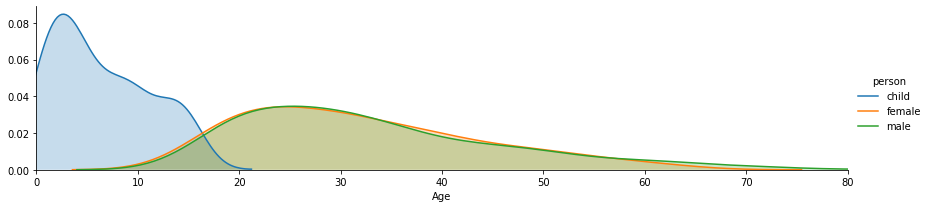

In [56]:
#We can do the same thimg to include the children

fig=sns.FacetGrid(titanic_df,hue="person",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)
oldest=titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

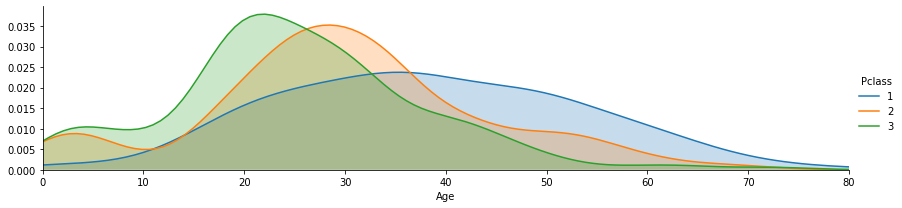

In [58]:
fig=sns.FacetGrid(titanic_df,hue="Pclass",aspect=4)
fig.map(sns.kdeplot,"Age",shade=True)
oldest=titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [59]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,male,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,female,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,female,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,female,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,male,S,male


In [60]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,male,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,female,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,female,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,female,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,male,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,male,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,male,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,male,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,female,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,female,C,child


In [62]:
data=pd.read_csv('Titanic_Detailed.csv')

In [63]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [64]:
# first we drop the NaN values and create a new object deck
deck=data["Cabin"].dropna()

In [65]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

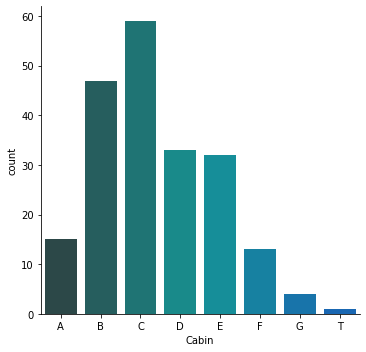

In [68]:
# So let's grab that letter for the deck level with a simple loop
# Set empty list for the levels

levels=[]
for level in deck:
    levels.append(level[0])
cabin_df=DataFrame(levels)
cabin_df.columns=["Cabin"]

cabin_df.Cabin=pd.Categorical(cabin_df.Cabin)

sns.catplot("Cabin", data=cabin_df, kind="count", palette="winter_d")

In [70]:
#Droping out T deck and plotting again

cabin_df=cabin_df[cabin_df.Cabin!='T']

#Also dropping the category
cabin_df.Cabin=cabin_df.Cabin.cat.remove_unused_categories()

C:\Users\Rishita\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


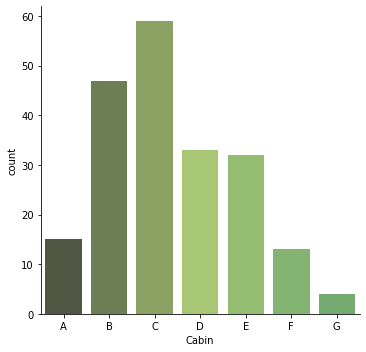

In [72]:
sns.catplot("Cabin", data=cabin_df, kind="count", palette="summer_d")

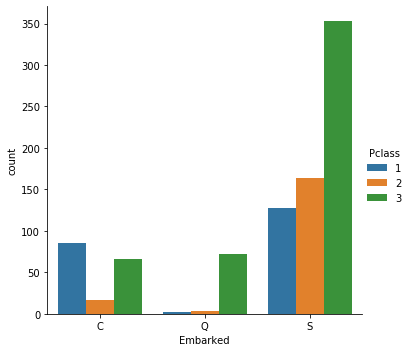

In [74]:
sns.catplot("Embarked", data=data, hue="Pclass", kind="count", order=["C","Q","S"])

### Who was alone and who was with family?

In [107]:
#Adding a column to define alone
data["Alone"]=data.Parch + data.SibSp

In [108]:
data["Alone"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [109]:
#Look for >0 and == to set status
data["Alone"].loc[data["Alone"] > 0] = "With Family"
data["Alone"].loc[data["Alone"] == 0] = "Alone"

In [110]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ALone,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,Alone


In [111]:
data.drop(columns="ALone",axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Alone


In [106]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ALone,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,Alone


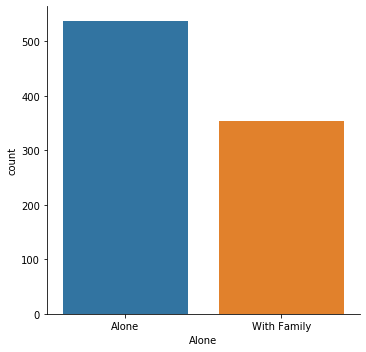

In [113]:
data.Alone=pd.Categorical(data.Alone)

sns.catplot("Alone", data=data, kind="count")

### What factors helped some people survive?

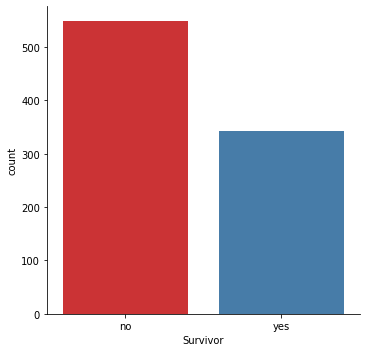

In [114]:
data["Survivor"]= data.Survived.map({0 : "no", 1: "yes"})
data.Survivor = pd.Categorical(data.Survivor)

sns.catplot("Survivor", data=data, kind="count", palette="Set1")

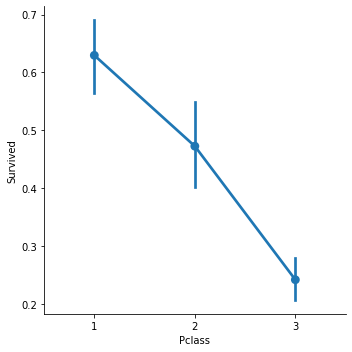

In [116]:
sns.catplot(x="Pclass", y="Survived", data=data, kind='point')

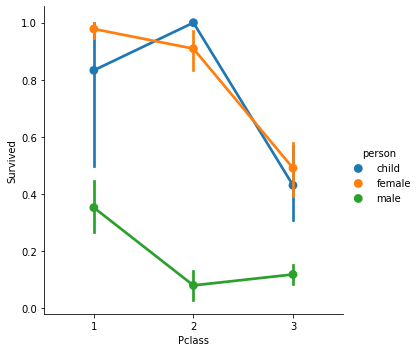

In [120]:
sns.catplot(x="Pclass", y="Survived", data=titanic_df, kind='point', hue="person")

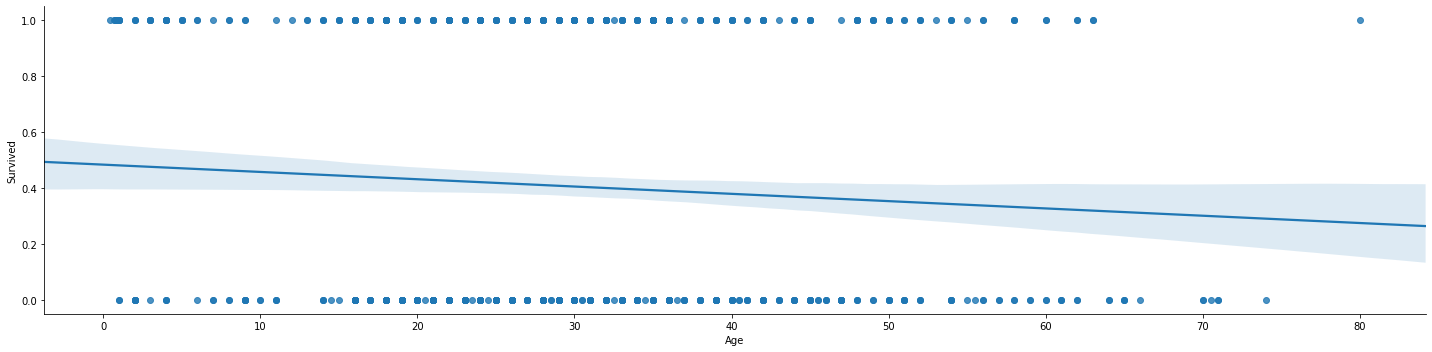

In [122]:
sns.lmplot("Age","Survived",data=data,aspect=4)

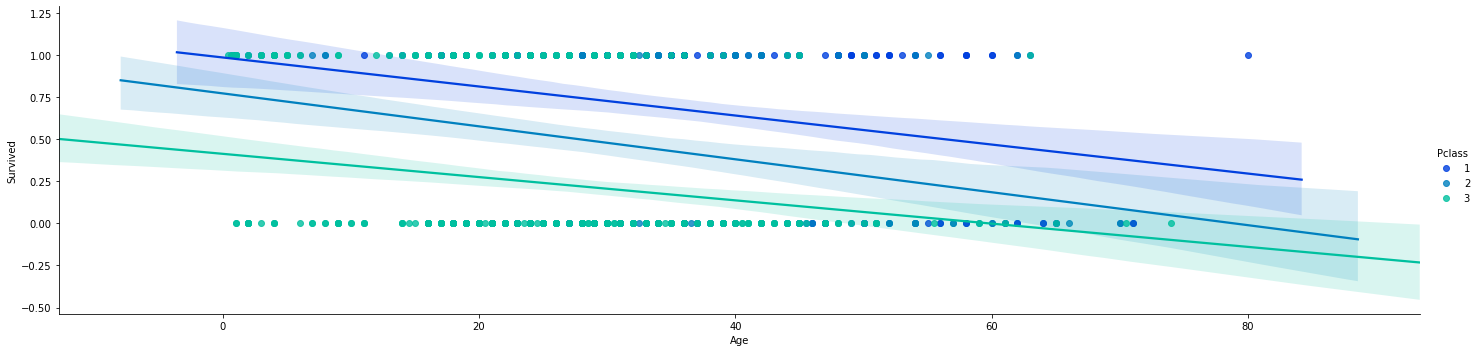

In [125]:
sns.lmplot("Age","Survived", data=data, hue="Pclass", palette="winter",aspect=4)

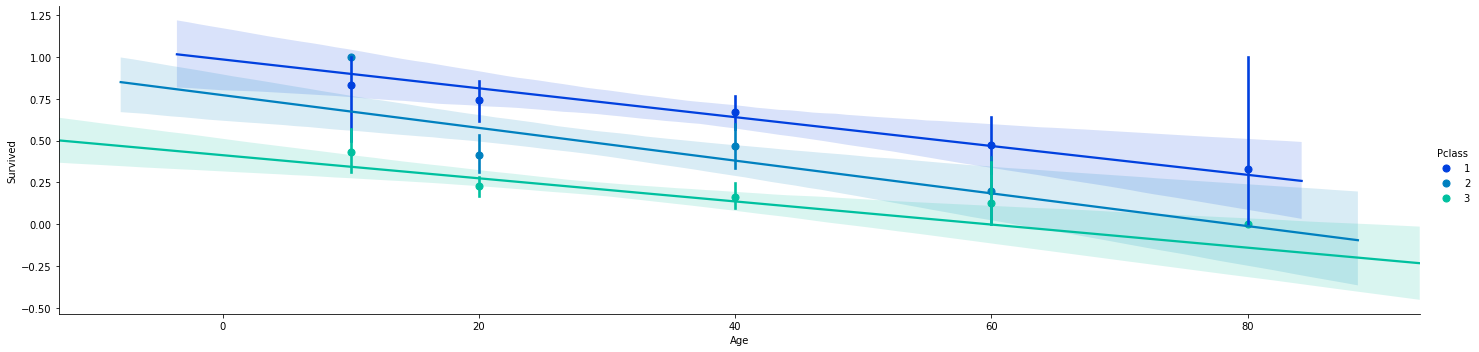

In [126]:
generations=[10,20,40,60,80]
sns.lmplot("Age","Survived", data=data,hue="Pclass",palette="winter",x_bins=generations,aspect=4)

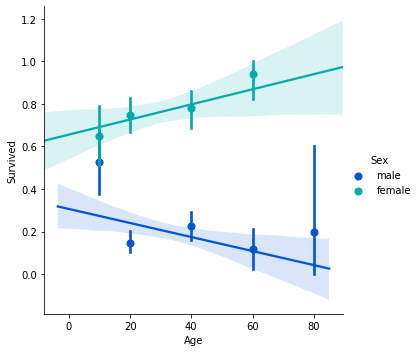

In [127]:
sns.lmplot("Age","Survived",data=data,hue="Sex",palette="winter",x_bins=generations)

### Did having a family member increase the odds of surviving the crash?


In [128]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ALone,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,Alone,no


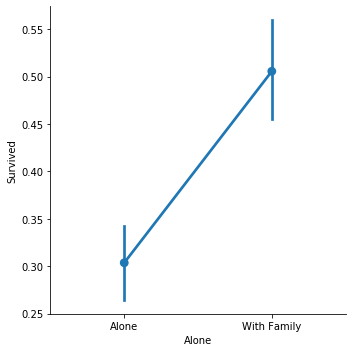

In [132]:
data["Alone"]=pd.Categorical(data["Alone"])
sns.catplot("Alone", "Survived",data=data, kind="point")

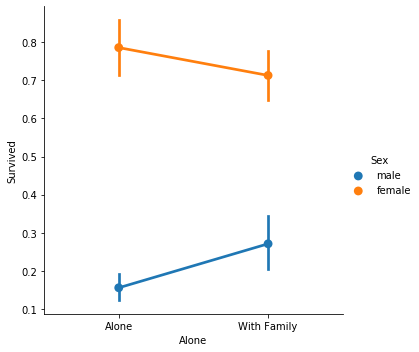

In [137]:
sns.catplot("Alone", "Survived",data=data, kind="point",hue="Sex")

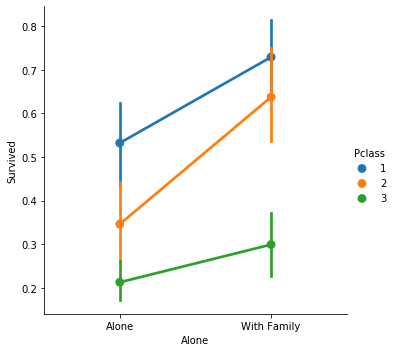

In [138]:
sns.catplot("Alone", "Survived",data=data, kind="point",hue="Pclass")

### Did the deck have an effect on the passengers survival rate?

In [139]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ALone,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,Alone,no


In [141]:
data["level"] = list(map(lambda x : "Unk" if pd.isna(x) else x[0], data.Cabin))

# Note: convert data type to category to have the correct sort in the graphics
data.level = pd.Categorical(data.level)

In [142]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ALone,Alone,Survivor,level
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,With Family,no,Unk
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Alone,yes,Unk
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,Alone,no,Unk


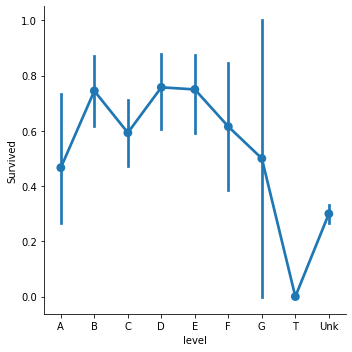

In [144]:
sns.catplot(x= "level", y="Survived", data=data, kind="point")

In [145]:
data.level.value_counts()


Unk    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: level, dtype: int64

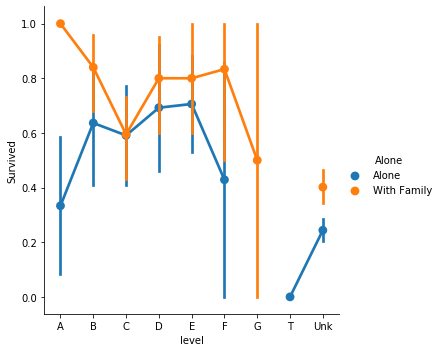

In [146]:
sns.catplot(x= "level", y="Survived", data=data, kind="point", hue="Alone")